# Novel Corona Virus 2019 Dataset

### Day level information on covid-19 affected cases

# About Dataset

### Context

From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. Data is extracted from the google sheets associated and made available here.

### Edited:

Now data is available as csv files in the Johns Hopkins Github repository. Please refer to the github repository for the Terms of Use details. Uploading it here for using it in Kaggle kernels and getting insights from the broader DS community.

### Content

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

#### Column Description

**covid_19_data.csv**

- Sno - Serial number
- ObservationDate - Date of the observation in MM/DD/YYYY
- Province/State - Province or state of the observation (Could be empty when missing)
- Country/Region - Country of observation
- Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
- Confirmed - Cumulative number of confirmed cases till that date
- Deaths - Cumulative number of of deaths till that date
- Recovered - Cumulative number of recovered cases till that date

In [145]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Load Dataset
df = pd.read_csv('./Dataset/covid_19_data.csv')

In [106]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [108]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [109]:
df.shape

(306429, 8)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [111]:
df['Confirmed'] = df['Confirmed'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Recovered'] = df['Recovered'].astype('int64')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              306429 non-null  int64 
 1   ObservationDate  306429 non-null  object
 2   Province/State   228326 non-null  object
 3   Country/Region   306429 non-null  object
 4   Last Update      306429 non-null  object
 5   Confirmed        306429 non-null  int64 
 6   Deaths           306429 non-null  int64 
 7   Recovered        306429 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ MB


In [113]:
df.isnull().sum().sum()

np.int64(78103)

In [114]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [116]:
df.fillna({'Province/State':'Unknown'}, inplace=True)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641,2335,95289
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147,245,0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364,1,1324
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550,1738,83790


In [117]:
df[df['Province/State'] == 'Unknown']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,Unknown,Japan,1/22/2020 17:00,2,0,0
36,37,01/22/2020,Unknown,Thailand,1/22/2020 17:00,4,0,2
37,38,01/22/2020,Unknown,South Korea,1/22/2020 17:00,1,0,0
38,39,01/22/2020,Unknown,China,1/22/2020 17:00,0,0,0
39,40,01/22/2020,Unknown,Kiribati,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
306369,306370,05/29/2021,Unknown,Mexico,2021-05-30 04:20:55,0,0,1924865
306370,306371,05/29/2021,Unknown,Netherlands,2021-05-30 04:20:55,3882,14,0
306371,306372,05/29/2021,Unknown,Peru,2021-05-30 04:20:55,0,0,1897522
306372,306373,05/29/2021,Unknown,Spain,2021-05-30 04:20:55,0,0,0


In [118]:
df.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [119]:
df = df.set_index('SNo')

In [120]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [121]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [122]:
df.describe()

,ObservationDate,Confirmed,Deaths,Recovered
count,306429,3.064290e+05,306429.000000,3.064290e+05
mean,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,NaN,2.775516e+05,6410.938048,2.015124e+05


In [123]:
df.describe(include='object')

,Province/State,Country/Region,Last Update
count,306429,306429,306429
unique,736,229,1905
top,Unknown,Russia,2021-04-02 15:13:53
freq,82226,30251,239885


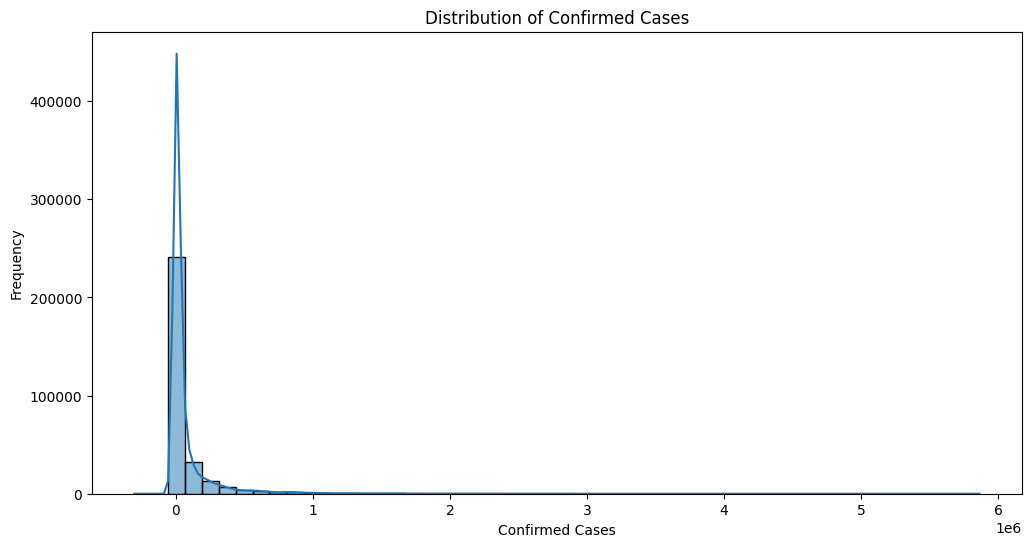

In [146]:
plt.figure(figsize=(12,6))
sns.histplot(df['Confirmed'],bins=50,kde=True)
plt.title("Distribution of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()

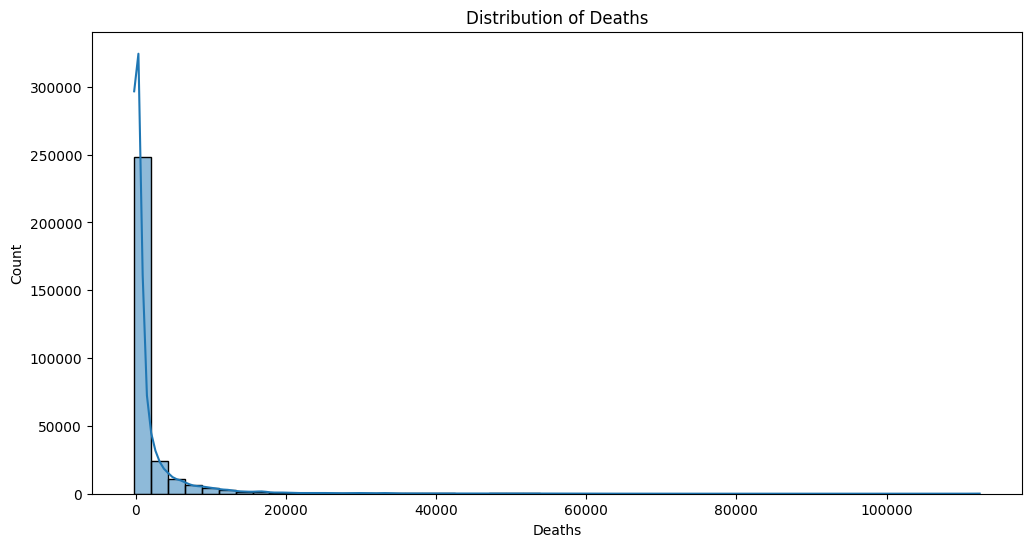

In [132]:
plt.figure(figsize=(12,6))
sns.histplot(df['Deaths'],bins=50,kde=True)
plt.title("Distribution of Deaths")
plt.show()

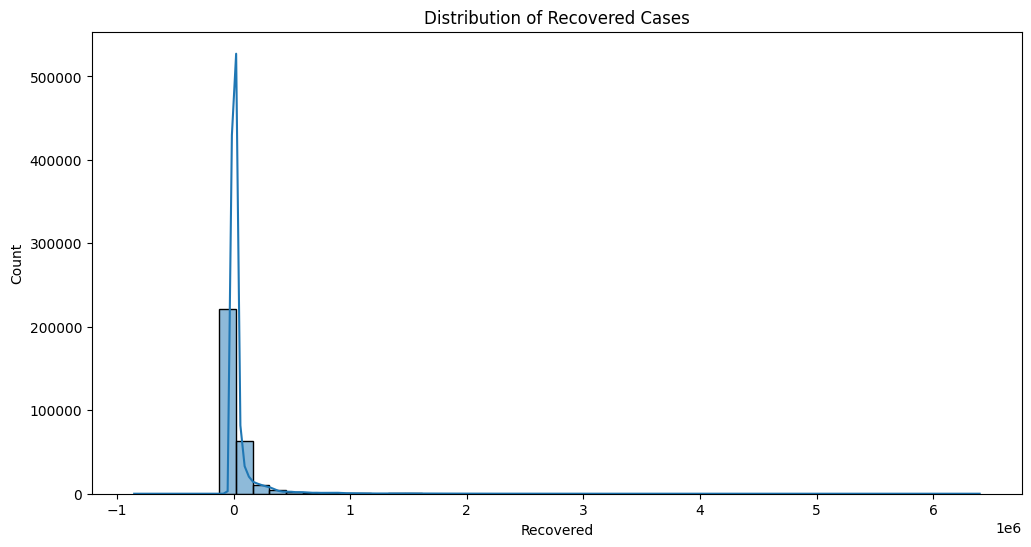

In [133]:
plt.figure(figsize=(12,6))
sns.histplot(df['Recovered'],bins=50,kde=True)
plt.title("Distribution of Recovered Cases")
plt.show()

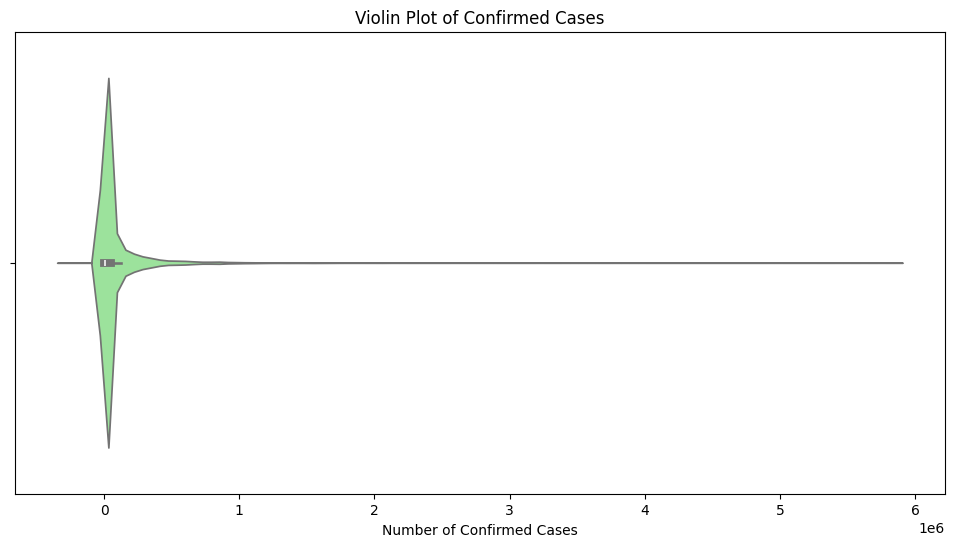

In [150]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=confirmed, color='lightgreen')
plt.title("Violin Plot of Confirmed Cases")
plt.xlabel("Number of Confirmed Cases")
plt.show()

### Confiremed Cases vs Deaths

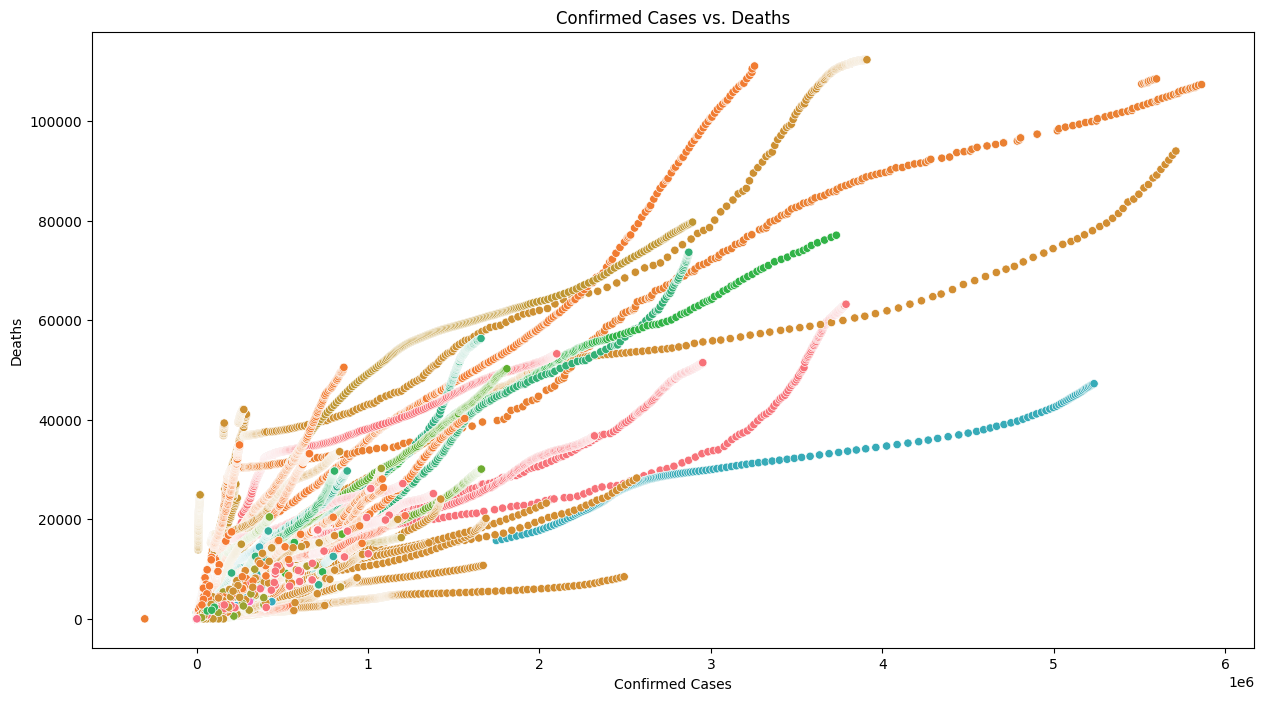

In [156]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Confirmed'], y=df['Deaths'], hue=df['Country/Region'],legend=False)
plt.title("Confirmed Cases vs. Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()

### Confiremed Cases VS Recovered

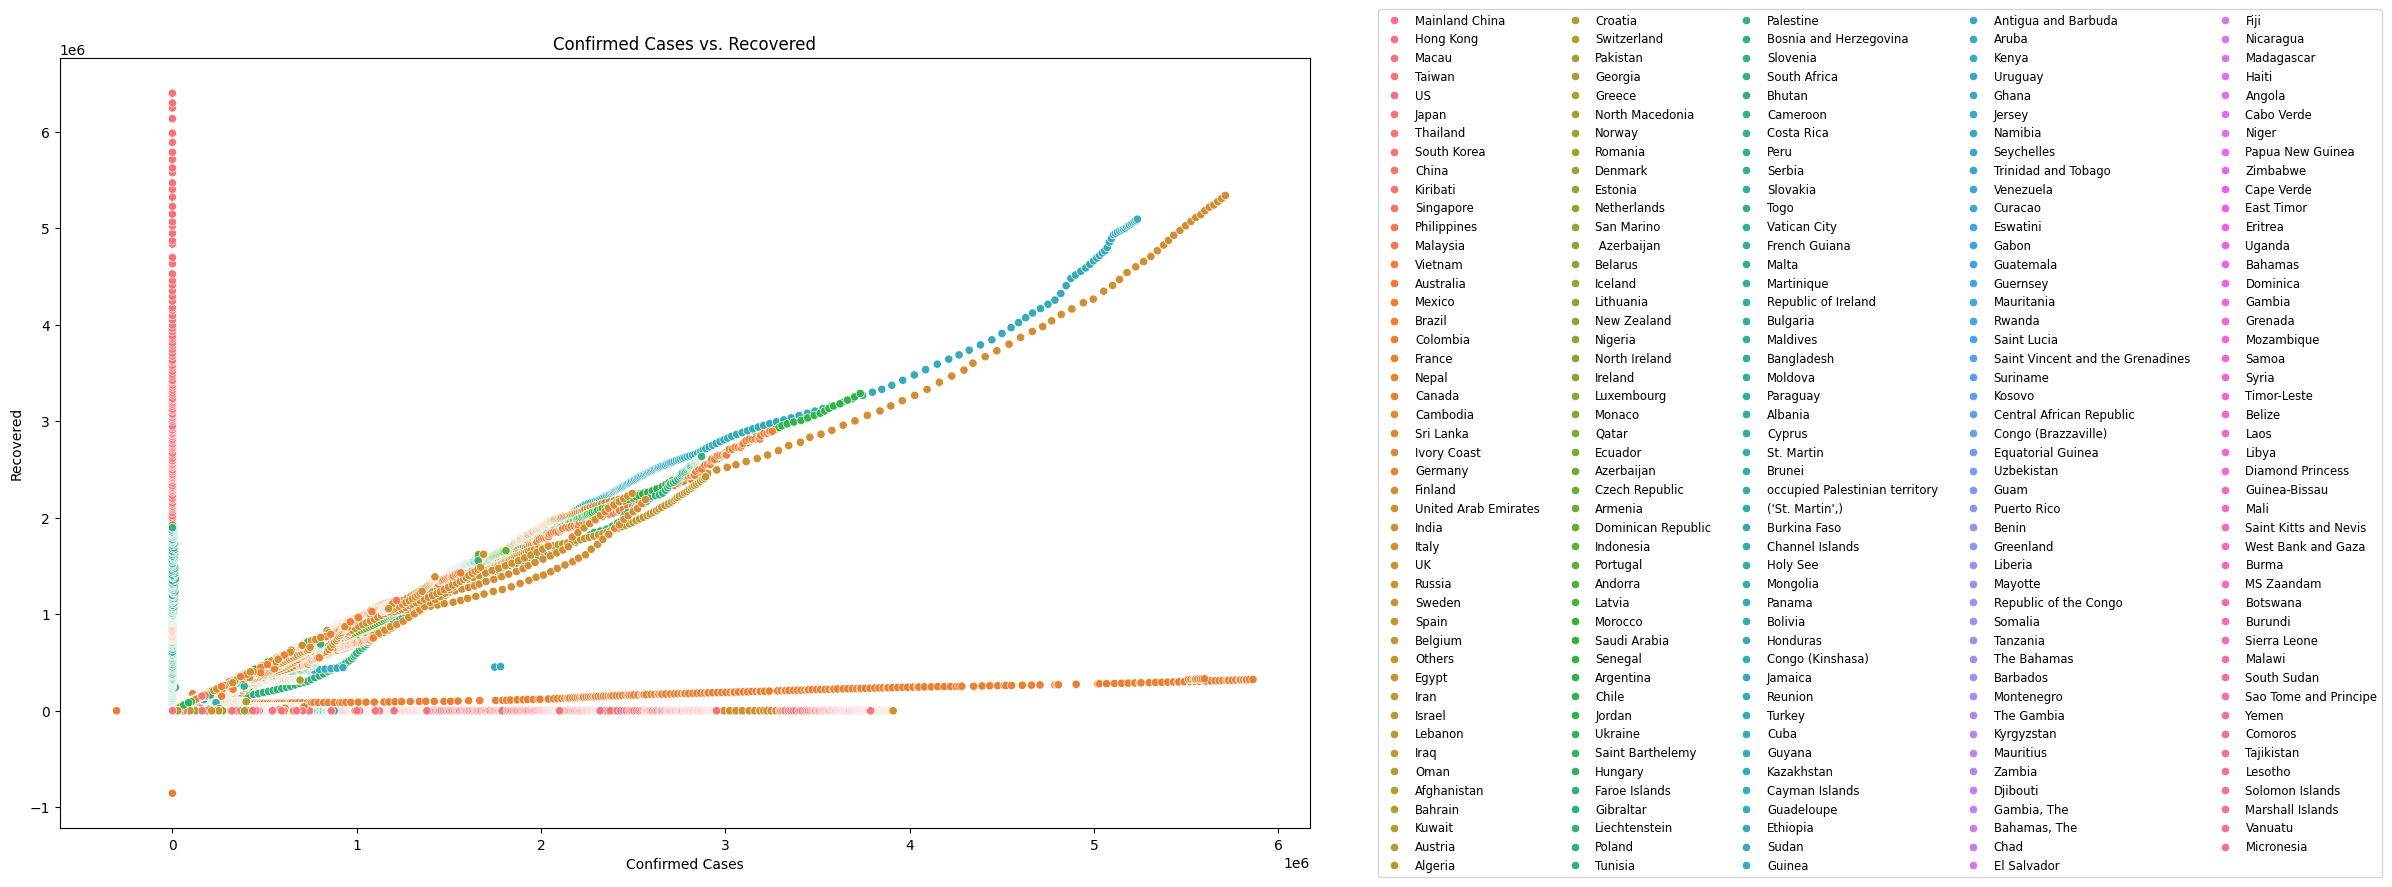

In [168]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df['Confirmed'], y=df['Recovered'], hue=df['Country/Region'])
plt.title("Confirmed Cases vs. Recovered")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovered")

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize='small', ncol=5)
plt.subplots_adjust(right=0.75)
plt.show()

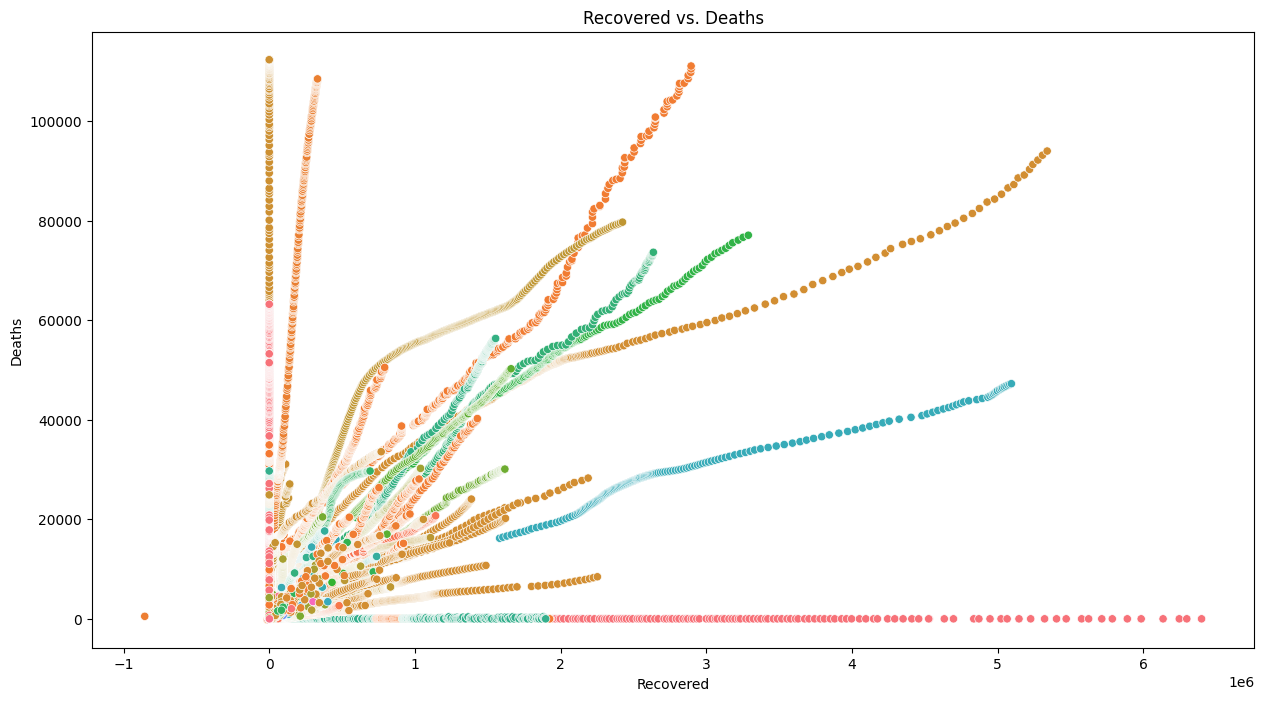

In [169]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Recovered'], y=df['Deaths'], hue=df['Country/Region'],legend=False)
plt.title("Recovered vs. Deaths")
plt.xlabel("Recovered")
plt.ylabel("Deaths")
plt.show()

In [170]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0


# Min and Max Deaths Per Country in a Day

In [185]:
grouped = df.groupby(['Country/Region', 'ObservationDate'])['Deaths'].agg(['max', 'min']).reset_index()
grouped.head()

,Country/Region,ObservationDate,max,min
0,Azerbaijan,2020-02-28,0,0
1,"('St. Martin',)",2020-03-10,0,0
2,Afghanistan,2020-02-24,0,0
3,Afghanistan,2020-02-25,0,0
4,Afghanistan,2020-02-26,0,0


In [191]:
grouped.rename(columns={'max': 'MaxDeaths', 'min': 'MinDeaths', 'ObservationDate' :'Date'},inplace=True)
grouped.head()

,Country/Region,Date,MaxDeaths,MinDeaths
0,Azerbaijan,2020-02-28,0,0
1,"('St. Martin',)",2020-03-10,0,0
2,Afghanistan,2020-02-24,0,0
3,Afghanistan,2020-02-25,0,0
4,Afghanistan,2020-02-26,0,0


In [192]:
melted = pd.melt(grouped, id_vars=['Country/Region', 'Date'], value_vars=['MaxDeaths', 'MinDeaths'], var_name='Type', value_name='Deaths')
melted.head()

,Country/Region,Date,Type,Deaths
0,Azerbaijan,2020-02-28,MaxDeaths,0
1,"('St. Martin',)",2020-03-10,MaxDeaths,0
2,Afghanistan,2020-02-24,MaxDeaths,0
3,Afghanistan,2020-02-25,MaxDeaths,0
4,Afghanistan,2020-02-26,MaxDeaths,0


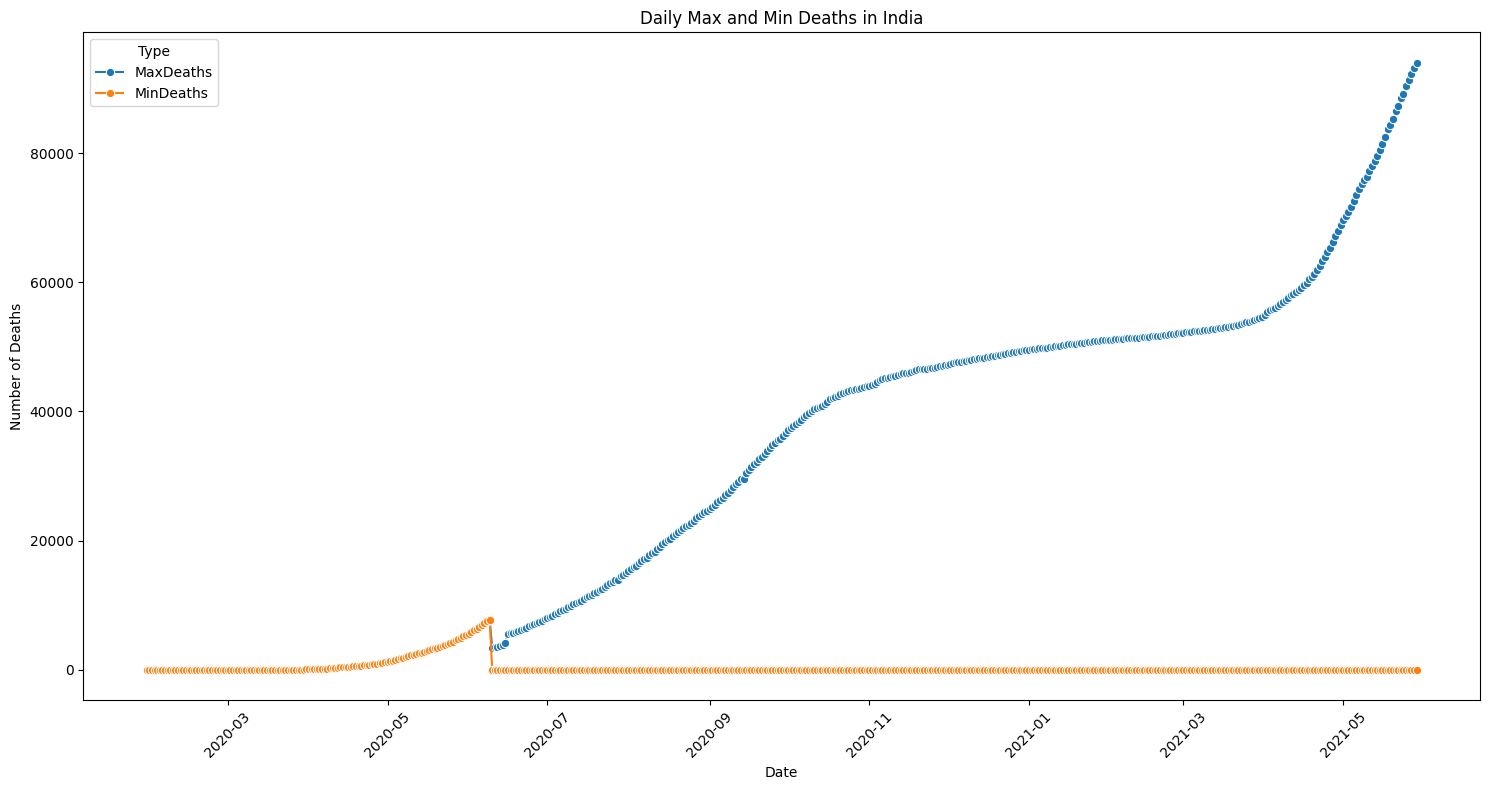

In [193]:
india_data = melted[melted['Country/Region'] == 'India']

plt.figure(figsize=(15, 8))
sns.lineplot(data=india_data, x='Date', y='Deaths', hue='Type', marker='o')
plt.title("Daily Max and Min Deaths in India")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

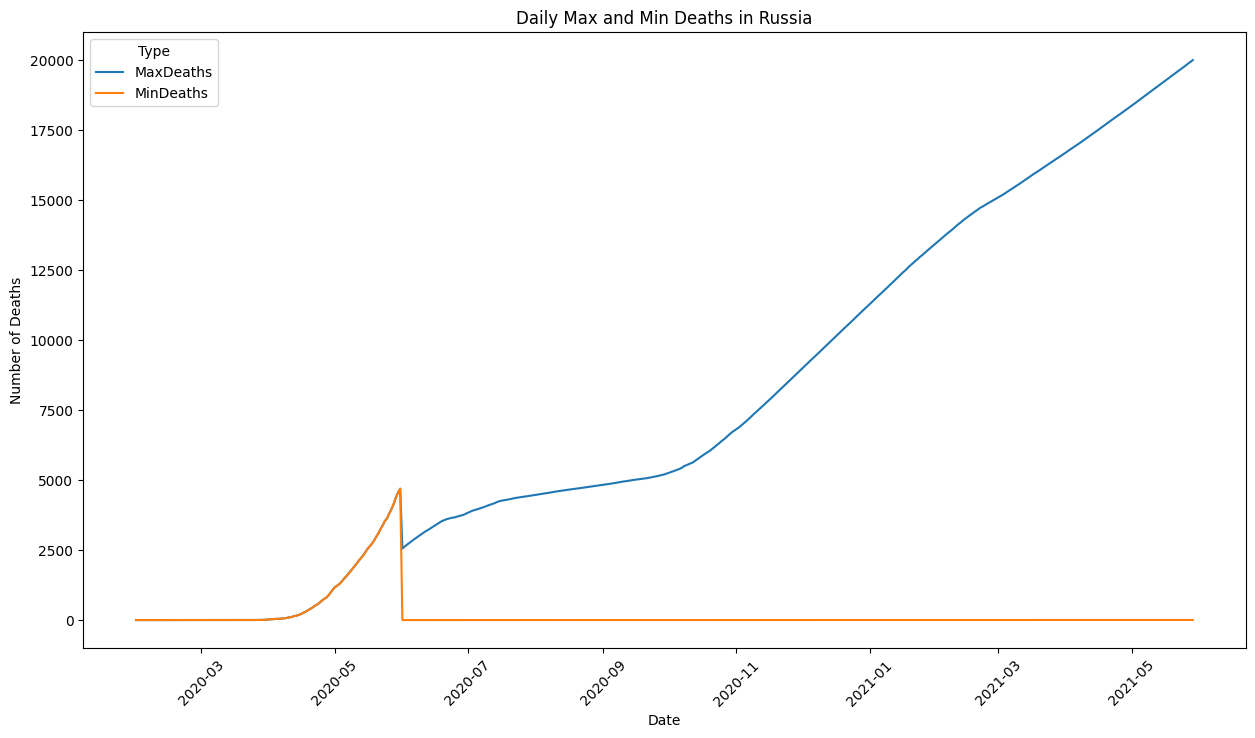

In [196]:
russia_data = melted[melted['Country/Region'] == 'Russia']

plt.figure(figsize=(15, 8))
sns.lineplot(data=russia_data, x='Date', y='Deaths', hue='Type')
plt.title("Daily Max and Min Deaths in Russia")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()

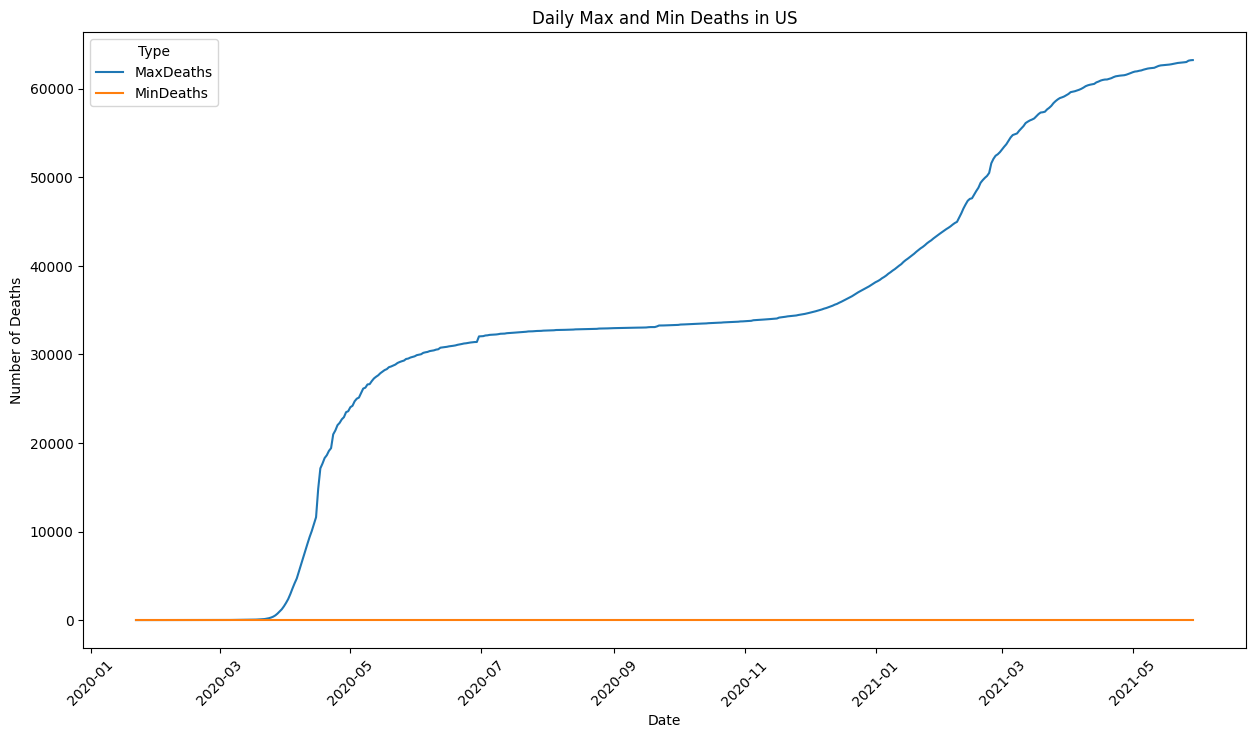

In [201]:
usa_data = melted[melted['Country/Region'] == 'US']

plt.figure(figsize=(15, 8))
sns.lineplot(data=usa_data, x='Date', y='Deaths', hue='Type')
plt.title("Daily Max and Min Deaths in US")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()

# Observations

1. **Data Quality & Missing Values:**

A significant portion of the "Province/State" column is missing for several countries, suggesting that for many countries only country-level data is recorded.
Date columns appear mostly complete once converted to a proper datetime format, ensuring that time trends can be reliably analyzed.


2. **Distribution & Central Tendency:**

The distribution of the "Confirmed" cases is highly right-skewed—many regions report relatively low counts, while a few regions show extremely high numbers.
Similar skewness is observed in the "Deaths" column, indicating that a small number of countries or regions are experiencing much higher mortality rates.


3. **Country-Wise Trends:**

When grouped by "Country/Region", some countries show very high maximum values of "Deaths" on specific dates compared to others. This could point to localized outbreaks or reporting artifacts.
The daily trends for a selected country (e.g., India or the US) show a clear pattern over time with peaks and troughs that might be linked to intervention measures, reporting delays, or regional outbreaks.


4. **Relationship between Variables:**

A scatter plot of "Confirmed" vs. "Recovered" cases indicates a positive relationship: generally, higher confirmed case counts are associated with higher recovered counts. However, the ratio and spread differ by country, suggesting variation in healthcare response and reporting practices.
Correlation analysis indicates that while the variables are related, there is significant variability that could be explored further with multivariate or time series analyses.


5. **Overall EDA Insights:**

The analysis confirms that the dataset is rich with time-series and geographical dimensions, but it also highlights challenges such as inconsistent data granularity (state vs. country level) and the presence of outliers.
These findings serve as a starting point to refine hypotheses for further analysis, such as investigating the causes of high mortality in specific regions or comparing recovery rates across different healthcare systems.